# Simplified ikeda Bilge keel
Comparison between original paper and IMO


In [1]:
import sympy as sp
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('equations.dill', mode='rb') as file:
    equations = dill.load(file)

In [3]:
with open('symbols.dill', mode='rb') as file:
    symbols = dill.load(file)

## Proposed Formula of the Bilge Keel Roll Damping

In [4]:
equations.B_n_BK

Eq(B_n_BK, A_BK*x_5*exp(B_B2K*x_3**B_B3K + B_BK))

In [5]:
from rolldecayestimators.substitute_dynamic_symbols import lambdify

In [6]:
lambdify(equations.B_B3K.rhs)

<function _lambdifygenerated(x_4)>

In [7]:
lambdify(equations.B_n_BK.rhs)

<function _lambdifygenerated(A_BK, B_B2K, B_B3K, B_BK, x_3, x_5)>

In [8]:
lambda_dict = {}
for name, equation in equations._asdict().items():
    lambda_dict[name] = lambdify(equation.rhs)

In [9]:
from collections import namedtuple
Lambdas = namedtuple('Lambdas', lambda_dict.keys())
lambdas = Lambdas(**lambda_dict)

In [10]:
from inspect import signature

In [11]:
def run(function,inputs):
    s = signature(function)
    input_names = set(s.parameters.keys())   
    return function(**inputs[input_names])

In [12]:
B = 60  # [m]
d = 20  # [m]
Lpp = 300  # [m]
b_BK = 0.03*B
l_BK = 0.3*Lpp
phi_a = 20  # [deg]
w_hat = 1.1
Cb = 0.58
Cm = 0.94

OG_div_d = np.linspace(-1.5,0,8)
OG = OG_div_d*d

inputs = pd.DataFrame()
inputs['OG'] = OG
inputs['OG/d'] = OG/d
inputs['x_1'] = B/d
inputs['x_2'] = Cb
inputs['x_3'] = Cm
inputs['x_4'] = OG/d
inputs['x_5'] = w_hat
inputs['x_6'] = phi_a
inputs['x_7'] = b_BK/B
inputs['x_8'] = l_BK/Lpp

inputs['f_1'] = run(lambdas.f_1, inputs)
inputs['f_2'] = run(lambdas.f_2, inputs)
inputs['f_3'] = run(lambdas.f_3, inputs)

inputs['A_BK'] = run(lambdas.A_BK, inputs)
inputs['B_B2K'] = run(lambdas.B_B2K, inputs)
inputs['B_B3K'] = run(lambdas.B_B3K, inputs)
inputs['B_BK'] = run(lambdas.B_BK, inputs)

inputs['B_n_BK'] = run(lambdas.B_n_BK, inputs)

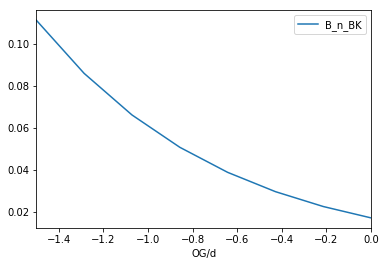

In [13]:
inputs.plot(x='OG/d', y='B_n_BK')

In [14]:
equations.f_1

Eq(f_1, -2.21*x_2 + 8.0089*(0.3907 - 0.3651*x_2)*(0.353356890459364*x_1 - 1)**2 + 2.632)

In [15]:
equations.f_2

Eq(f_2, 0.00255*x_6**2 + 0.122*x_6 + 0.4794)

In [16]:
equations.f_3

Eq(f_3, x_8**2*(-0.8913*x_7**2 - 0.0733*x_7) + x_8*(5.2857*x_7**2 - 0.01185*x_7 + 0.00189))

In [17]:
equations.B_BK

Eq(B_BK, x_4*(0.3*x_1 + 0.00125*x_6**2 - 0.0425*x_6 + 5*x_7 - 0.2*x_8 - 1.86))

In [18]:
equations.B_B2K

Eq(B_B2K, -0.1*x_1 + 1.2*x_2 - 0.0657*x_4**2 + 0.0586*x_4 - 15*x_7 + 1.6164)

In [19]:
equations.B_B3K

Eq(B_B3K, 2.5*x_4 + 15.75)

## IMO implementation

In [20]:
Q7_str = """
0 1 2 3
1 0 -0.3651 0.3907
2 0 -2.21 2.632
3 0.00255 0.122 0.4794
4 -0.8913 -0.0733 0
5 5.2857 -0.01185 0.00189
6 0.00125 -0.0425 -1.86
7 -0.0657 0.0586 1.6164
"""

In [21]:
Q7 = np.fromstring(Q7_str,sep=' ').reshape(8,4)
Q7

array([[ 0.0000e+00,  1.0000e+00,  2.0000e+00,  3.0000e+00],
       [ 1.0000e+00,  0.0000e+00, -3.6510e-01,  3.9070e-01],
       [ 2.0000e+00,  0.0000e+00, -2.2100e+00,  2.6320e+00],
       [ 3.0000e+00,  2.5500e-03,  1.2200e-01,  4.7940e-01],
       [ 4.0000e+00, -8.9130e-01, -7.3300e-02,  0.0000e+00],
       [ 5.0000e+00,  5.2857e+00, -1.1850e-02,  1.8900e-03],
       [ 6.0000e+00,  1.2500e-03, -4.2500e-02, -1.8600e+00],
       [ 7.0000e+00, -6.5700e-02,  5.8600e-02,  1.6164e+00]])

In [22]:
inputs_IMO = pd.DataFrame()
OG = inputs_IMO['OG'] = OG
inputs_IMO['OG/d'] = OG/d
x_1 = inputs_IMO['x_1'] = B/d
x_2 = inputs_IMO['x_2'] = Cb
x_3 = inputs_IMO['x_3'] = Cm
x_4 = inputs_IMO['x_4'] = OG/d
x_5 = inputs_IMO['x_5'] = w_hat
x_6 = inputs_IMO['x_6'] = phi_a
x_7 = inputs_IMO['x_7'] = b_BK/B
x_8 = inputs_IMO['x_8'] = l_BK/Lpp

In [23]:
i = np.arange(1,3+1)
sum1 = np.sum(Q7[1,i]*x_2**(3-i))
sum2 = np.sum(Q7[2,i]*x_2**(3-i))

f_1 = inputs_IMO['f_1'] = (x_1-2.83)**2*sum1 + sum2
#f_1 = inputs_IMO['f_1'] = (-0.365*x_2+0.3907)*(x_1-2.83)**2-2.21*x_2+2.632

f_2 = inputs_IMO['f_2'] = np.sum(Q7[3,i]*x_6**(3-i))

rows=2
columns=3
sum3 = np.zeros((rows+1,columns+1))
for i in np.arange(1,rows+1):
    for j in np.arange(1,columns+1):
        sum3[i,j] = Q7[3+i,j]*x_7**(3-j)*x_8**(3-i)
             
f_3 = inputs_IMO['f_3'] = np.sum(np.sum(sum3))

In [24]:
i = np.arange(1,3+1)
sum4 = np.sum(Q7[6,i]*x_6**(3-i))
B_BK = inputs_IMO['B_BK'] = x_4*(5*x_7+0.3*x_1-0.2*x_8 + sum4)

## The $B_{BK2}$ equation in IMO is incorrect...

In [25]:
rows=2
sum5 = np.zeros(len(inputs_IMO))
for i in np.arange(1,rows+1):
    sum5+=Q7[7,i]*(OG/d)**(3-i)
#B_B2K = inputs_IMO['B_B2K'] = -15*x_7+1.2*x_2-0.1*x_1 + sum5

B_B2K = inputs_IMO['B_B2K'] = (-15*x_7+1.2*x_2-0.1*x_1
                               -0.0657*x_4**2+0.0586*x_4+1.6164)

B_B3K = inputs_IMO['B_B3K'] = 2.5*OG/d+15.75
A_BK = inputs_IMO['A_BK'] = f_1*f_2*f_3
B_n_BK = inputs_IMO['B_n_BK'] = A_BK*w_hat*np.exp(B_BK+B_B2K*x_3**(B_B3K))

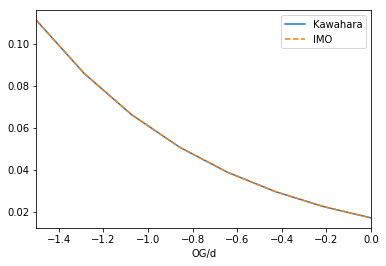

In [30]:
fig,ax = plt.subplots()
inputs.plot(x='OG/d', y='B_n_BK', label='Kawahara', ax=ax)
inputs_IMO.plot(x='OG/d', y='B_n_BK', label='IMO', style='--',ax=ax)


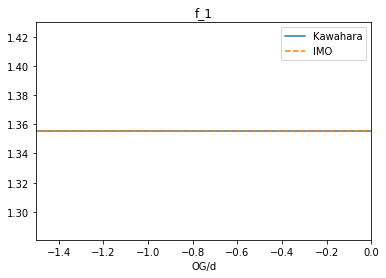

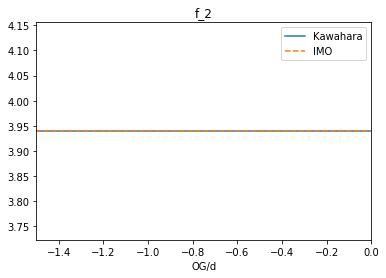

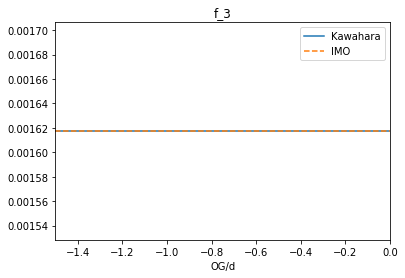

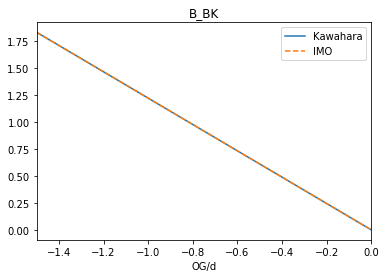

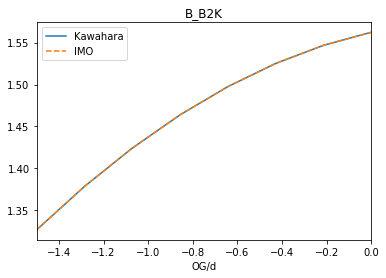

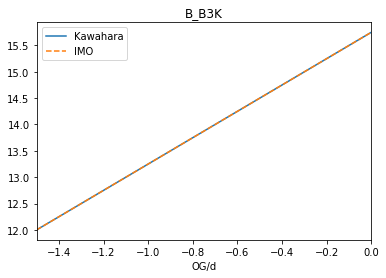

In [31]:

ys = ['f_1','f_2','f_3','B_BK','B_B2K','B_B3K']

for y in ys:
    fig,ax = plt.subplots()
    inputs.plot(x='OG/d', y=y, label='Kawahara', ax=ax)
    inputs_IMO.plot(x='OG/d', y=y, label='IMO', style='--', ax=ax)
    ax.set_title(y)